<a href="https://colab.research.google.com/github/vlrhsgody/AI2/blob/main/DL_CSE_CIC_IDS2018_CNN_24_02_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [135]:
from google.colab import drive

In [136]:
import warnings
warnings.filterwarnings("ignore")

In [137]:

import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv" ,  nrows=10000)
df2 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-15-2018.csv",  nrows=10000)
df3 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-16-2018.csv",  nrows=10000)

In [3]:

df4 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-20-2018.csv', nrows=10000)

In [6]:
df5 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-21-2018.csv', nrows=10000)
df6 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-22-2018.csv',  nrows=10000)
df7 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-23-2018.csv',  nrows=10000)
df8 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-28-2018.csv',  nrows=10000)
df9 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/03-01-2018.csv',  nrows=10000)
df10 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/03-02-2018.csv',  nrows=10000)


<ipython-input-6-e99ab1172079>:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df9 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/03-01-2018.csv',  nrows=10000)


In [7]:
!pip install dask

In [49]:
df1

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0,0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0,0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0,0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21,6,14/02/2018 10:38:24,2,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
9996,21,6,14/02/2018 10:38:24,25,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
9997,21,6,14/02/2018 10:38:24,4,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
9998,21,6,14/02/2018 10:38:24,4,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce


In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
def fix_data_type(df):

    df = df[df['Dst Port'] != 'Dst Port']

    df['Dst Port'] = df['Dst Port'].astype(int)
    df['Protocol'] = df['Protocol'].astype(int)
    df['Flow Duration'] = df['Flow Duration'].astype(int)
    df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
    df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
    df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
    df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
    df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
    df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
    df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
    df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
    df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
    df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
    df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
    df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
    df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
    df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
    df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
    df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
    df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
    df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
    df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
    df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
    df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
    df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
    df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
    df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
    df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
    df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
    df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
    df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
    df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
    df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
    df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
    df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
    df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
    df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
    df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
    df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
    df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
    df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
    df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
    df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
    df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
    df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
    df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
    df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
    df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
    df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
    df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
    df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
    df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
    df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
    df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
    df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
    df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
    df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
    df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
    df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
    df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
    df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
    df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
    df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
    df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
    df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
    df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
    df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
    df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
    df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
    df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
    df['Active Mean'] = df['Active Mean'].astype(float)
    df['Active Std'] = df['Active Std'].astype(float)
    df['Active Max'] = df['Active Max'].astype(int)
    df['Active Min'] = df['Active Min'].astype(int)
    df['Idle Mean'] = df['Idle Mean'].astype(float)
    df['Idle Std'] = df['Idle Std'].astype(float)
    df['Idle Max'] = df['Idle Max'].astype(int)
    df['Idle Min'] = df['Idle Min'].astype(int)

    return df

In [52]:

df_d1 = fix_data_type(df1)
df_d2 = fix_data_type(df2)
df_d3 = fix_data_type(df3)
df_d4 = fix_data_type(df4)
df_d5 = fix_data_type(df5)
df_d6 = fix_data_type(df6)
df_d7 = fix_data_type(df7)
df_d8 = fix_data_type(df8)
df_d9 = fix_data_type(df9)
df_d10 = fix_data_type(df10)

In [53]:
def drop_infinate_null(df):
    print(df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df = df.dropna()

    print(df.shape)

    return df

In [54]:
%%time
df_d1 = drop_infinate_null(df_d1)
df_d2 = drop_infinate_null(df_d2)
df_d3 = drop_infinate_null(df_d3)
df_d4 = drop_infinate_null(df_d4)
df_d5 = drop_infinate_null(df_d5)
df_d6 = drop_infinate_null(df_d6)
df_d7 = drop_infinate_null(df_d7)
df_d8 = drop_infinate_null(df_d8)
df_d9 = drop_infinate_null(df_d9)
df_d10 = drop_infinate_null(df_d10)

(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 84)
(10000, 84)
(10000, 80)
(10000, 80)
(10000, 80)
(9925, 80)
(10000, 80)
(9935, 80)
(10000, 80)
(9801, 80)
(9999, 80)
(9753, 80)
(10000, 80)
(9968, 80)
CPU times: user 443 ms, sys: 56.8 ms, total: 500 ms
Wall time: 506 ms


In [55]:
def generate_binary_label(df):
    # encode the target feature
    df['Threat'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Threat'].unique())
    print(df['Threat'].value_counts())
    return df

In [56]:
%%time
df_d1 = generate_binary_label(df_d1)
df_d2 = generate_binary_label(df_d2)
df_d3 = generate_binary_label(df_d3)
df_d4 = generate_binary_label(df_d4)
df_d5 = generate_binary_label(df_d5)
df_d6 = generate_binary_label(df_d6)
df_d7 = generate_binary_label(df_d7)
df_d8 = generate_binary_label(df_d8)
df_d9 = generate_binary_label(df_d9)
df_d10 = generate_binary_label(df_d10)

['Benign' 'Malicious']
Malicious    9904
Benign         96
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9931
Benign         69
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9899
Benign        101
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9934
Benign         66
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    7800
Benign       2200
Name: Threat, dtype: int64
['Benign' 'Malicious']
Benign       9563
Malicious     362
Name: Threat, dtype: int64
['Benign' 'Malicious']
Benign       9369
Malicious     566
Name: Threat, dtype: int64
['Benign']
Benign    9801
Name: Threat, dtype: int64
['Benign']
Benign    9753
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    8520
Benign       1448
Name: Threat, dtype: int64
CPU times: user 85.3 ms, sys: 0 ns, total: 85.3 ms
Wall time: 95.5 ms


In [57]:


mapping= {'SSH-Bruteforce': 'Brute-force',
          'FTP-BruteForce': 'Brute-force',
          ################ Brute-force

          'Brute Force -XSS': 'Web attack',
          'Brute Force -Web': 'Web attack',
          'SQL Injection': 'Web attack',
          ################ Web attack

          'DoS attacks-Hulk': 'DoS attack',
          'DoS attacks-SlowHTTPTest': 'DoS attack',
          'DoS attacks-Slowloris': 'DoS attack',
          'DoS attacks-GoldenEye': 'DoS attack',
          ################ DoS attack

          'DDOS attack-HOIC': 'DDoS attack',
          'DDOS attack-LOIC-UDP': 'DDoS attack',
          'DDoS attacks-LOIC-HTTP': 'DDoS attack',
          ################ DDoS attack

          'Bot': 'Botnet',
          ################ Botnet

          'Infilteration': 'Infilteration',
          ################ Infilteration

          'Benign': 'Benign',
          'Label': 'Benign',
          ################ Infilteration
    }

def transform_multi_label(df):
    print(df['Label'].value_counts())
    df['Label'] = df['Label'].map(mapping)
    return df

In [58]:
%%time
df_d1 = transform_multi_label(df_d1)
df_d2 = transform_multi_label(df_d2)
df_d3 = transform_multi_label(df_d3)
df_d4 = transform_multi_label(df_d4)
df_d5 = transform_multi_label(df_d5)
df_d6 = transform_multi_label(df_d6)
df_d7 = transform_multi_label(df_d7)
df_d8 = transform_multi_label(df_d8)
df_d9 = transform_multi_label(df_d9)
df_d10 = transform_multi_label(df_d10)

FTP-BruteForce    9904
Benign              96
Name: Label, dtype: int64
DoS attacks-GoldenEye    9931
Benign                     69
Name: Label, dtype: int64
DoS attacks-SlowHTTPTest    9899
Benign                       101
Name: Label, dtype: int64
DDoS attacks-LOIC-HTTP    9934
Benign                      66
Name: Label, dtype: int64
DDOS attack-HOIC        6070
Benign                  2200
DDOS attack-LOIC-UDP    1730
Name: Label, dtype: int64
Benign              9563
Brute Force -Web     249
Brute Force -XSS      79
SQL Injection         34
Name: Label, dtype: int64
Benign              9369
Brute Force -Web     362
Brute Force -XSS     151
SQL Injection         53
Name: Label, dtype: int64
Benign    9801
Name: Label, dtype: int64
Benign    9753
Name: Label, dtype: int64
Bot       8520
Benign    1448
Name: Label, dtype: int64
CPU times: user 57.8 ms, sys: 0 ns, total: 57.8 ms
Wall time: 64.7 ms


In [59]:
from imblearn.under_sampling import RandomUnderSampler

def balance_data(df):
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y)

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())

    return df

In [60]:

df_d1 = fix_data_type(df_d1)
df_d2 = fix_data_type(df_d2)
df_d3 = fix_data_type(df_d3)
df_d4 = fix_data_type(df_d4)
df_d5 = fix_data_type(df_d5)
df_d6 = fix_data_type(df_d6)
df_d7 = fix_data_type(df_d7)
df_d8 = fix_data_type(df_d8)
df_d9 = fix_data_type(df_d9)
df_d10 = fix_data_type(df_d10)

In [61]:
df_d1

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Threat
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Benign,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21,6,14/02/2018 10:38:24,2,1,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Brute-force,Malicious
9996,21,6,14/02/2018 10:38:24,25,1,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Brute-force,Malicious
9997,21,6,14/02/2018 10:38:24,4,1,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Brute-force,Malicious
9998,21,6,14/02/2018 10:38:24,4,1,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,Brute-force,Malicious


In [62]:
df_all = pd.concat([df_d1, df_d2], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d1, df_d2

df_all = pd.concat([df_all, df_d3], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d3

df_all = pd.concat([df_all, df_d4], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d4

df_all = pd.concat([df_all, df_d5], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d5

df_all = pd.concat([df_all, df_d6], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d6

df_all = pd.concat([df_all, df_d7], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d7

df_all = pd.concat([df_all, df_d8], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d8

df_all = pd.concat([df_all, df_d9], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d9

df_all = pd.concat([df_all, df_d10], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d10

In [63]:
print(df_all['Label'].value_counts())

Benign         42466
DoS attack     19830
DDoS attack    17734
Brute-force     9904
Botnet          8520
Web attack       928
Name: Label, dtype: int64


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Text(0.5, 1.0, 'Label')

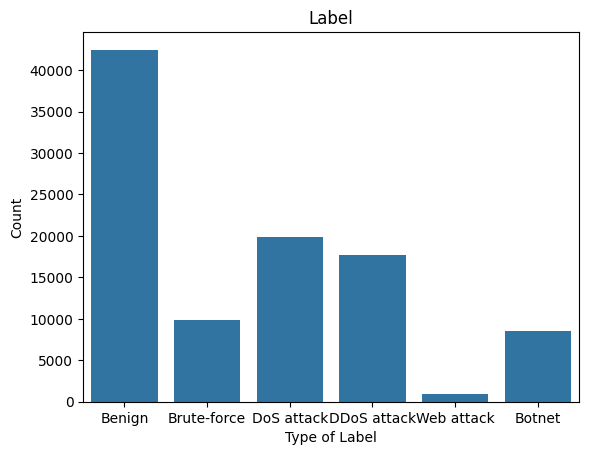

In [65]:
sns.countplot(data = df_all, x="Label")
plt.xlabel("Type of Label")
plt.ylabel("Count")
plt.title("Label")

In [66]:
# attack_df = df_all[df_all["Threat"] != "Benign"]
# normal_df = df_all[df_all["Threat"] == "Benign"].sample(n=len(attack_df))

# df_all = pd.concat([attack_df, normal_df], axis=0)
# del attack_df, normal_df

In [67]:
variances = df_all.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_all = df_all.drop(constant_columns, axis=1)

print(constant_columns)
print (df_all.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(99382, 77)


In [68]:
duplicates = set()
for i in range(0, len(df_all.columns)):
    col1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col2 = df_all.columns[j]
        if(df_all[col1].equals(df_all[col2])):
            duplicates.add(col2)

In [69]:
print (duplicates)
df_all.drop(duplicates, axis=1, inplace=True)
print (df_all.shape)

{'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'SYN Flag Cnt', 'CWE Flag Count', 'Bwd Seg Size Avg'}
(99382, 70)


In [83]:
df_all = df_all.drop(columns=['Timestamp', 'Threat', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP'])
print(df_all.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99382 entries, 0 to 99381
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           99382 non-null  int64  
 1   Protocol           99382 non-null  int64  
 2   Fwd Pkt Len Mean   99382 non-null  float64
 3   Fwd Pkt Len Std    99382 non-null  float64
 4   Bwd Pkt Len Min    99382 non-null  int64  
 5   Bwd Pkt Len Mean   99382 non-null  float64
 6   Flow Byts/s        99382 non-null  float64
 7   Fwd IAT Tot        99382 non-null  int64  
 8   Fwd IAT Std        99382 non-null  float64
 9   Fwd IAT Min        99382 non-null  int64  
 10  Bwd IAT Tot        99382 non-null  int64  
 11  Bwd IAT Mean       99382 non-null  float64
 12  Bwd IAT Max        99382 non-null  int64  
 13  Bwd IAT Min        99382 non-null  int64  
 14  Fwd PSH Flags      99382 non-null  int64  
 15  Fwd URG Flags      99382 non-null  int64  
 16  Fwd Pkts/s         993

In [84]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_all['Label_Encoded'] = label_encoder.fit_transform(df_all['Label'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99382 entries, 0 to 99381
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           99382 non-null  int64  
 1   Protocol           99382 non-null  int64  
 2   Fwd Pkt Len Mean   99382 non-null  float64
 3   Fwd Pkt Len Std    99382 non-null  float64
 4   Bwd Pkt Len Min    99382 non-null  int64  
 5   Bwd Pkt Len Mean   99382 non-null  float64
 6   Flow Byts/s        99382 non-null  float64
 7   Fwd IAT Tot        99382 non-null  int64  
 8   Fwd IAT Std        99382 non-null  float64
 9   Fwd IAT Min        99382 non-null  int64  
 10  Bwd IAT Tot        99382 non-null  int64  
 11  Bwd IAT Mean       99382 non-null  float64
 12  Bwd IAT Max        99382 non-null  int64  
 13  Bwd IAT Min        99382 non-null  int64  
 14  Fwd PSH Flags      99382 non-null  int64  
 15  Fwd URG Flags      99382 non-null  int64  
 16  Fwd Pkts/s         993

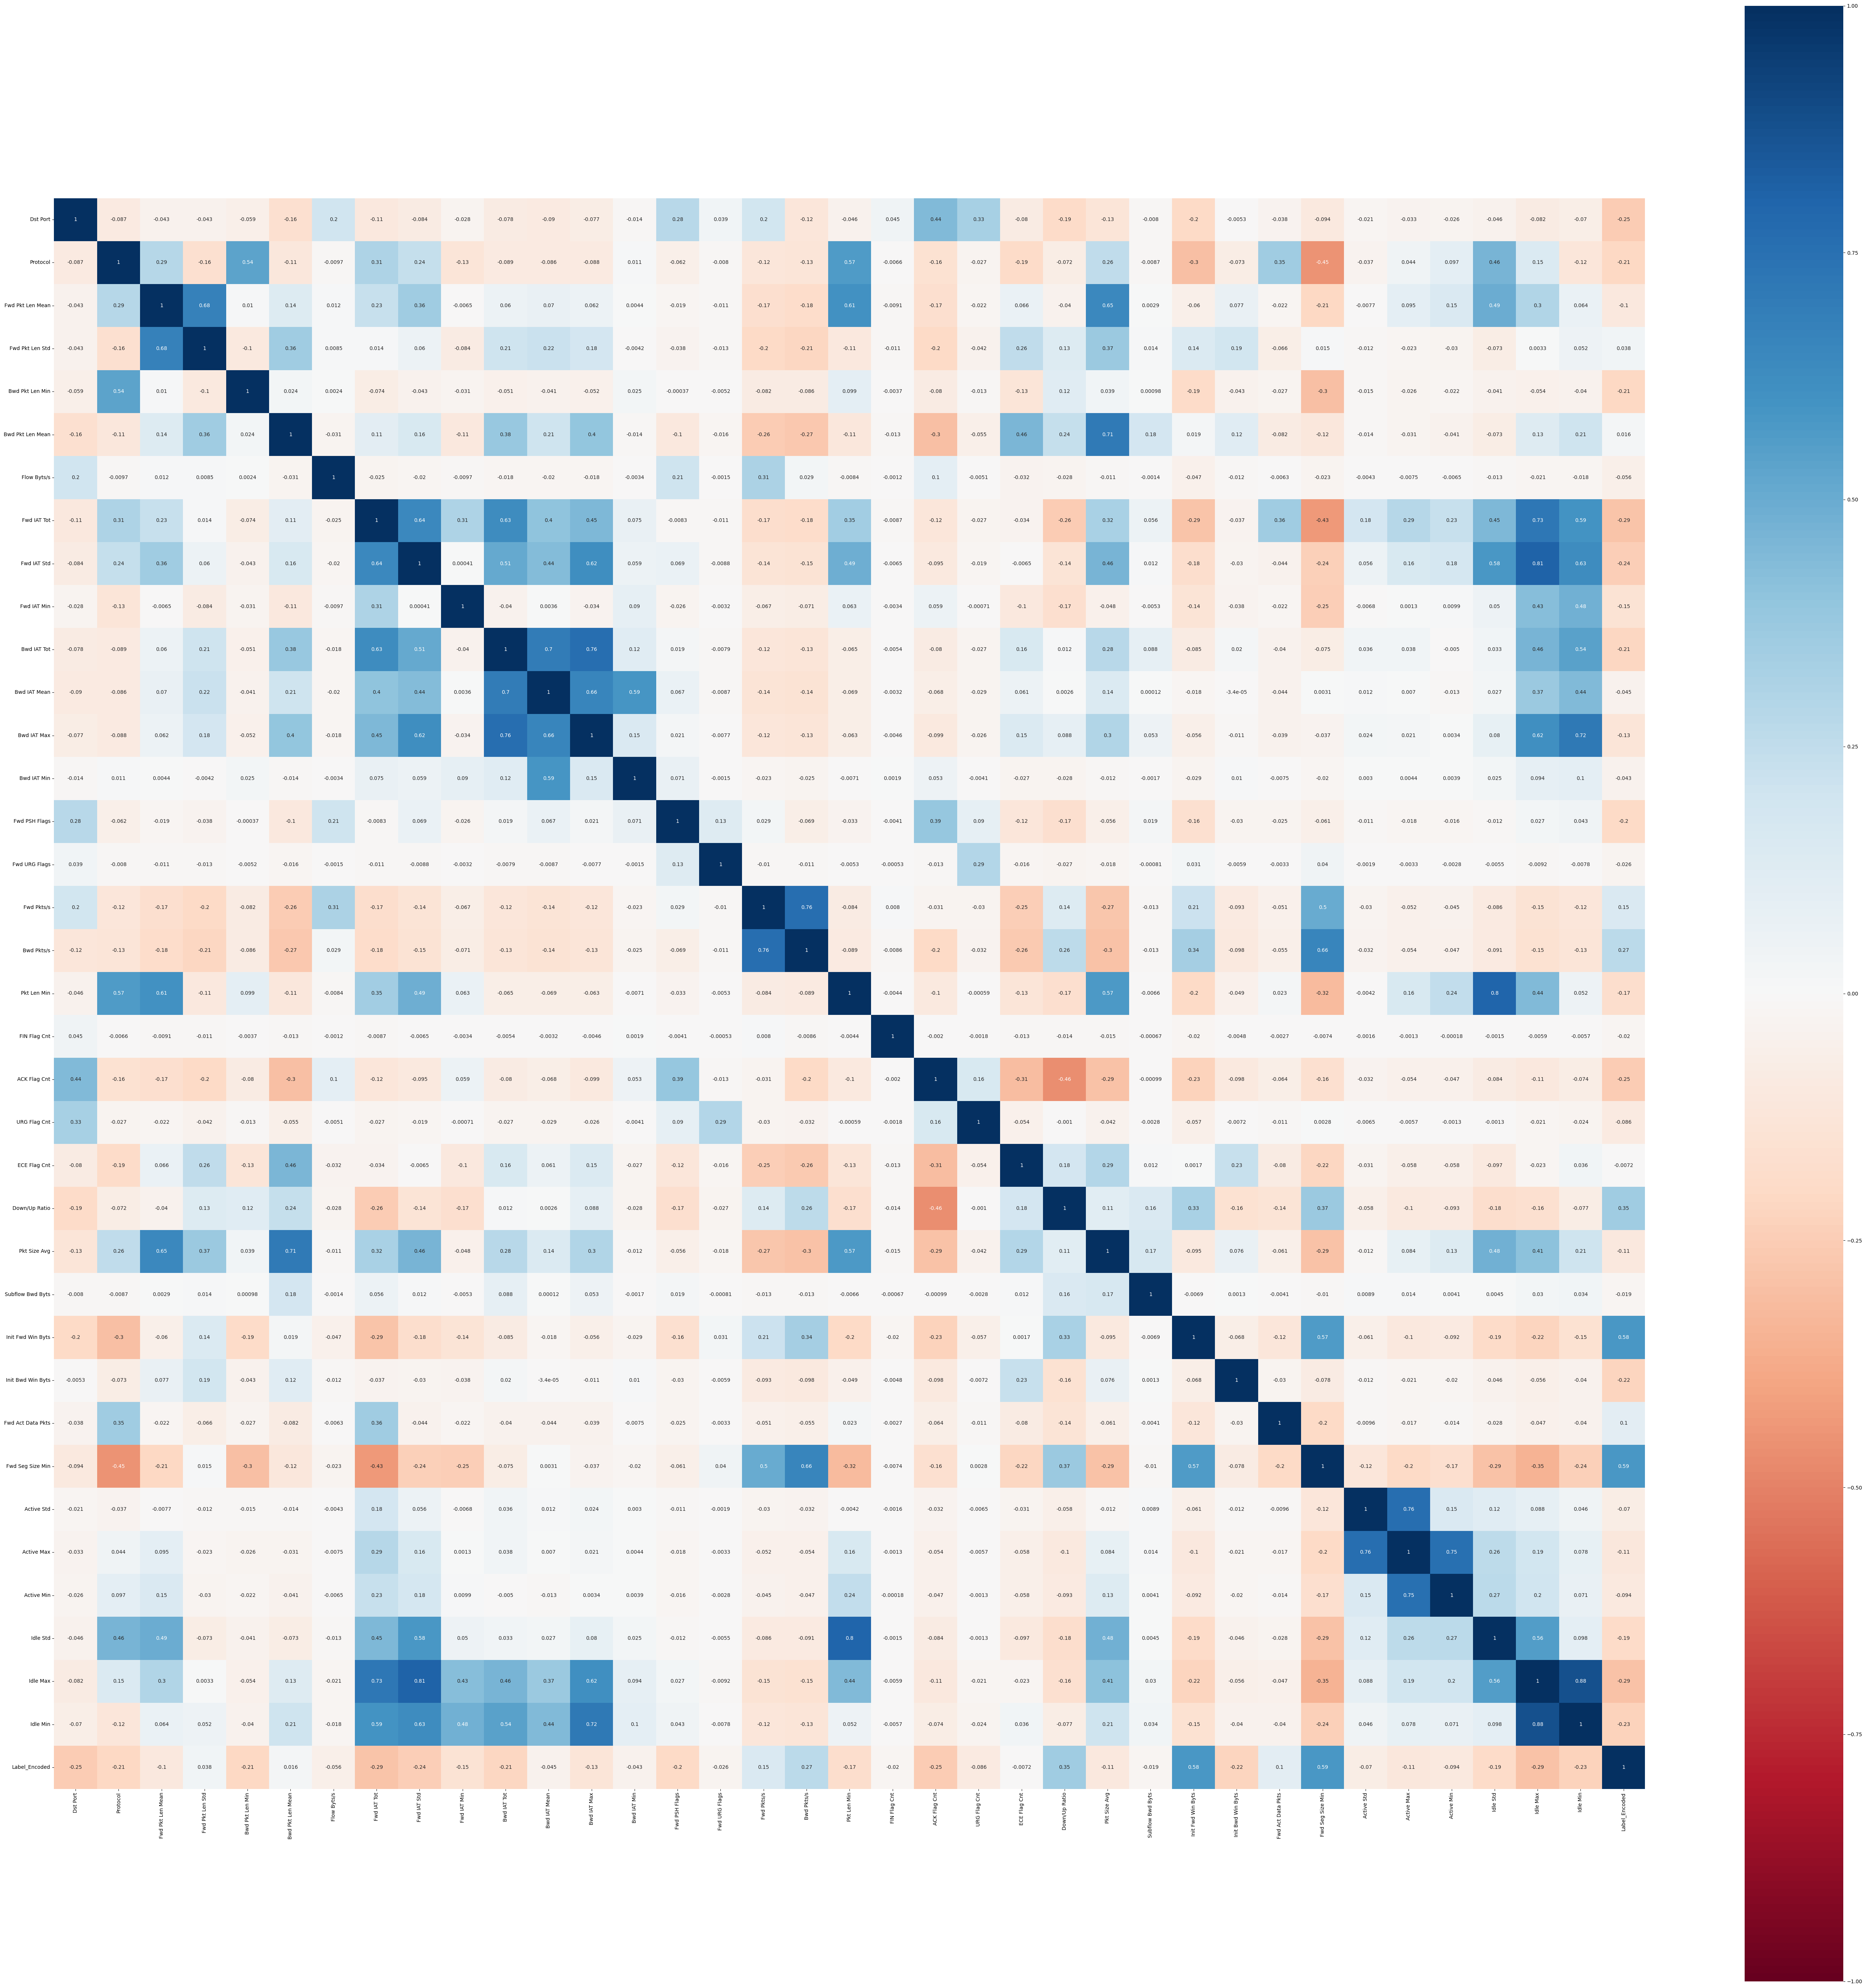

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [88]:
X = df_all.drop(['Label', 'Label_Encoded'], axis=1)
X.head()


,Dst Port,Protocol,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow Byts/s,Fwd IAT Tot,Fwd IAT Std,Fwd IAT Min,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Std,Idle Max,Idle Min
0,0,0,0.000000,0.000000,0,0.000000,0.000000,112641719,139.300036,56320761,...,-1,-1,0,0,0.0,0,0,139.300036,56320958,56320761
1,0,0,0.000000,0.000000,0,0.000000,0.000000,112641466,114.551299,56320652,...,-1,-1,0,0,0.0,0,0,114.551299,56320814,56320652
2,0,0,0.000000,0.000000,0,0.000000,0.000000,112638623,301.934596,56319098,...,-1,-1,0,0,0.0,0,0,301.934596,56319525,56319098
3,22,6,82.600000,196.741237,0,227.300000,544.161528,6453966,123109.423588,229740,...,65535,233,6,32,0.0,0,0,0.000000,0,0
4,22,6,81.642857,203.745545,0,200.818182,380.733175,8804066,532416.970959,246924,...,5808,233,6,32,0.0,0,0,0.000000,0,0


In [91]:
y=df_all['Label_Encoded']
y.value_counts()

0    42466
4    19830
3    17734
2     9904
1     8520
5      928
Name: Label_Encoded, dtype: int64

In [92]:
#CNN

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [94]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [95]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(89439, 5, 36) (89439,)
(9935, 5, 36) (9935,)


In [96]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
# 시퀀스 변환 후에 2차원 배열로 변환하여 스케일링을 적용해야 함
X_train_reshaped = X_train.reshape(X_train.shape[0] * X_train.shape[1], X_train.shape[2])
maxabs_scaler.fit(X_train_reshaped)

# 훈련 데이터 스케일링
X_train_scaled = maxabs_scaler.transform(X_train_reshaped)
# 2차원 배열을 다시 3차원 배열로 변환
X_train_scaled = X_train_scaled.reshape(X_train.shape)

# 테스트 데이터의 스케일링
# 시퀀스 변환 후에 2차원 배열로 변환하여 스케일링을 적용해야 함
X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
X_test_scaled = maxabs_scaler.transform(X_test_reshaped)
# 2차원 배열을 다시 3차원 배열로 변환
X_test_scaled = X_test_scaled.reshape(X_test.shape)

In [97]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89439, 5, 36), (9935, 5, 36), (89439,), (9935,))

In [98]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [99]:

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [100]:

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]
print(n_timesteps, n_features, n_outputs)

5 36 6


In [104]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation="relu")(flat)
outputs = Dense(6, activation="sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 36)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6976      
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 19,718
Trainable params: 19,718
Non-trainable params: 0
_________________________________________________________________


In [105]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
2516/2516 [==============================] - 8s 3ms/step - loss: 19827.9395 - accuracy: 0.4350 - val_loss: 58.4308 - val_accuracy: 0.4422
Epoch 2/30
2516/2516 [==============================] - 8s 3ms/step - loss: 26.0164 - accuracy: 0.4402 - val_loss: 6.2583 - val_accuracy: 0.4264
Epoch 3/30
2516/2516 [==============================] - 6s 2ms/step - loss: 2.9112 - accuracy: 0.4269 - val_loss: 3.1210 - val_accuracy: 0.4236
Epoch 4/30
2516/2516 [==============================] - 8s 3ms/step - loss: 0.5761 - accuracy: 0.4269 - val_loss: 9.7219 - val_accuracy: 0.4235
Epoch 5/30
2516/2516 [==============================] - 11s 4ms/step - loss: 4.1810 - accuracy: 0.4269 - val_loss: 0.3880 - val_accuracy: 0.4236
Epoch 6/30
2516/2516 [==============================] - 17s 7ms/step - loss: 0.5556 - accuracy: 0.4270 - val_loss: 0.3879 - val_accuracy: 0.4239
Epoch 7/30
2516/2516 [==============================] - 10s 4ms/step - loss: 1.7983 - accuracy: 0.4270 - val_loss: 15.1464 - val

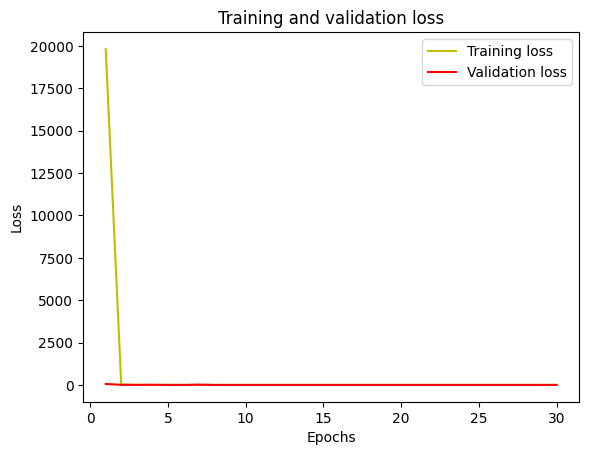

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

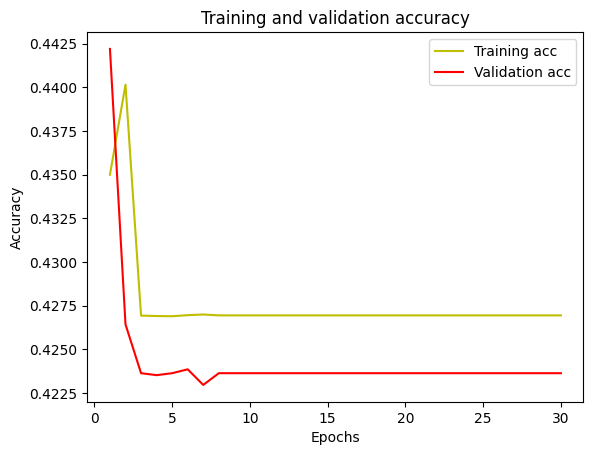

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [108]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

311/311 [==============================] - 1s 1ms/step


In [109]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60      4306
           1       0.00      0.00      0.00       866
           2       0.00      0.00      0.00       982
           3       0.00      0.00      0.00      1702
           4       0.00      0.00      0.00      1984
           5       0.00      0.00      0.00        95

    accuracy                           0.43      9935
   macro avg       0.07      0.17      0.10      9935
weighted avg       0.19      0.43      0.26      9935

[[4306    0    0    0    0    0]
 [ 866    0    0    0    0    0]
 [ 982    0    0    0    0    0]
 [1702    0    0    0    0    0]
 [1984    0    0    0    0    0]
 [  95    0    0    0    0    0]]
